<a href="https://colab.research.google.com/github/Abdoul1996/Statistic-learning/blob/main/Mid_term_simulation_partI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Parameters
mu0, mu1 = 0, 10
sigma2 = 36
sigma = np.sqrt(sigma2)
pi0, pi1 = 0.2, 0.8

# Part I :  k-Neirest Neighbord techniques

In [ ]:
import pandas as pd

# Define the data
data = {
    'Obs.': [1, 2, 3, 4, 5, 6],
    'X1': [2, 1, -1, -2, 1, 2],
    'X2': [-1, 1, 1, 1, 0, 3],
    'X3': [0, 0, 3, 0, 1, 1],
    'Y': ['Red', 'Green', 'Red', 'Green', 'Green', 'Red']
}

# Create the DataFrame
df = pd.DataFrame(data)

# Show the DataFrame
df.head()


,Obs.,X1,X2,X3,Y
0,1,2,-1,0,Red
1,2,1,1,0,Green
2,3,-1,1,3,Red
3,4,-2,1,0,Green
4,5,1,0,1,Green


In [ ]:
# Define test points
test_point = np.array([1,-1,0])

In [ ]:
test_point

array([ 1, -1,  0])

In [ ]:
# Step 3: Compute Euclidean distance to each observation
def euclidean_distance(row):
    return np.sqrt((row['X1'] - test_point[0])**2 +
                   (row['X2'] - test_point[1])**2 +
                   (row['X3'] - test_point[2])**2)

In [ ]:
df['Euclidean Distance'] = df.apply(euclidean_distance, axis=1)
df

,Obs.,X1,X2,X3,Y,Euclidean Distance
0,1,2,-1,0,Red,1.000000
1,2,1,1,0,Green,2.000000
2,3,-1,1,3,Red,4.123106
3,4,-2,1,0,Green,3.605551
4,5,1,0,1,Green,1.414214
5,6,2,3,1,Red,4.242641


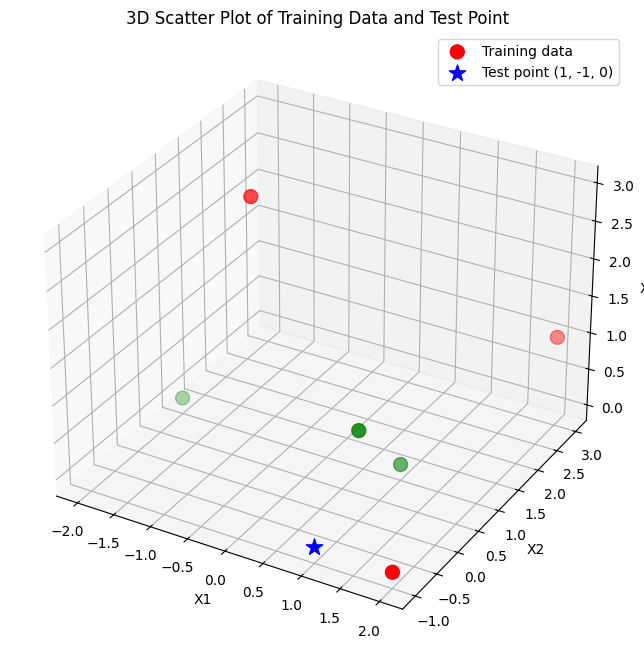

In [ ]:
# Create 3D figure
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

# Color map: Red and Green
colors = df['Y'].map({'Red': 'red', 'Green': 'green'})

# Plot training points
ax.scatter(df['X1'], df['X2'], df['X3'], c=colors, s=100, label='Training data')

# Plot test point
ax.scatter(1, -1, 0, c='blue', s=150, marker='*', label='Test point (1, -1, 0)')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D Scatter Plot of Training Data and Test Point')
ax.legend()

plt.show()


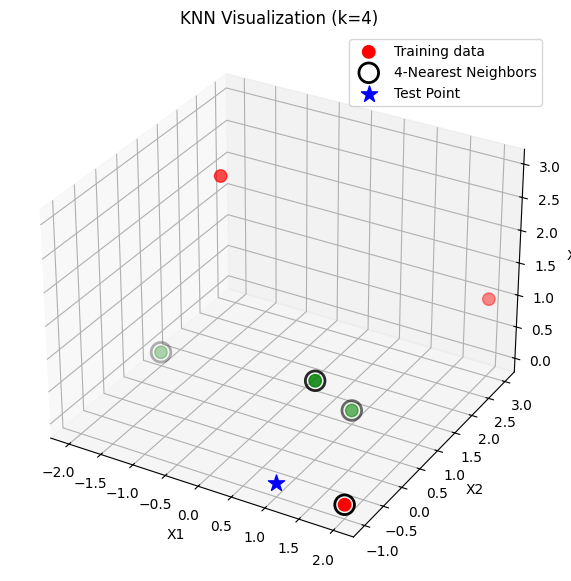

In [ ]:

# Sort and get k=3 nearest
k = 4
nearest = df.nsmallest(k, 'Euclidean Distance')

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Color mapping
colors = df['Y'].map({'Red': 'red', 'Green': 'green'})

# Plot all training data
ax.scatter(df['X1'], df['X2'], df['X3'], c=colors, s=80, label='Training data')

# Plot k nearest neighbors with a different edge color
ax.scatter(nearest['X1'], nearest['X2'], nearest['X3'],
           facecolors='none', edgecolors='black', s=200, linewidths=2, label=f'{k}-Nearest Neighbors')

# Plot test point
ax.scatter(test_point[0], test_point[1], test_point[2],
           c='blue', s=150, marker='*', label='Test Point')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title(f'KNN Visualization (k={k})')
ax.legend()
plt.show()

In [ ]:
df

,Obs.,X1,X2,X3,Y,Euclidean Distance
0,1,2,-1,0,Red,1.000000
1,2,1,1,0,Green,2.000000
2,3,-1,1,3,Red,4.123106
3,4,-2,1,0,Green,3.605551
4,5,1,0,1,Green,1.414214
5,6,2,3,1,Red,4.242641


In [ ]:
nearest

,Obs.,X1,X2,X3,Y,Euclidean Distance
0,1,2,-1,0,Red,1.000000
4,5,1,0,1,Green,1.414214
1,2,1,1,0,Green,2.000000
3,4,-2,1,0,Green,3.605551


## Part III : Bayes theorem

In [ ]:
from scipy.stats import norm

# Given values
mu1 = 10   # mean of X for Y=1 (dividend)
mu0 = 0    # mean of X for Y=0 (no dividend)
sigma = np.sqrt(36)  # std deviation
prior_1 = 0.8         # P(Y = 1)
prior_0 = 0.2         # P(Y = 0)

In [ ]:
# Observation
x = 4

# Likelihoods: P(x | Y=1), P(x | Y=0)
likelihood_1 = norm.pdf(x, loc=mu1, scale=sigma)
likelihood_0 = norm.pdf(x, loc=mu0, scale=sigma)

In [ ]:
# Posterior numerators
numerator_1 = likelihood_1 * prior_1
numerator_0 = likelihood_0 * prior_0

In [ ]:
# Normalize to get posterior probabilities
posterior_1 = numerator_1 / (numerator_1 + numerator_0)
posterior_0 = numerator_0 / (numerator_1 + numerator_0)

In [ ]:
# Output
print(f"P(Y=1 | X=4) = {posterior_1:.4f}")
print(f"P(Y=0 | X=4) = {posterior_0:.4f}")

prediction = "YES (will issue dividend)" if posterior_1 > posterior_0 else "NO (will not issue dividend)"
print("Prediction:", prediction)

P(Y=1 | X=4) = 0.7519
P(Y=0 | X=4) = 0.2481
Prediction: YES (will issue dividend)


### Plotting Evaluating the posterior probabilities

In [ ]:
x_vals = np.linspace(-10, 20, 500)

In [ ]:
# Likelihoods
p_x_given_y1 = norm.pdf(x_vals, loc=mu1, scale=sigma)
p_x_given_y0 = norm.pdf(x_vals, loc=mu0, scale=sigma)


In [ ]:

# Unnormalized posteriors (numerators in Bayes' Rule)
posterior_1 = p_x_given_y1 * prior_1
posterior_0 = p_x_given_y0 * prior_0


In [ ]:

# Normalize to get true posterior
posterior_total = posterior_1 + posterior_0
posterior_y1_given_x = posterior_1 / posterior_total
posterior_y0_given_x = posterior_0 / posterior_total

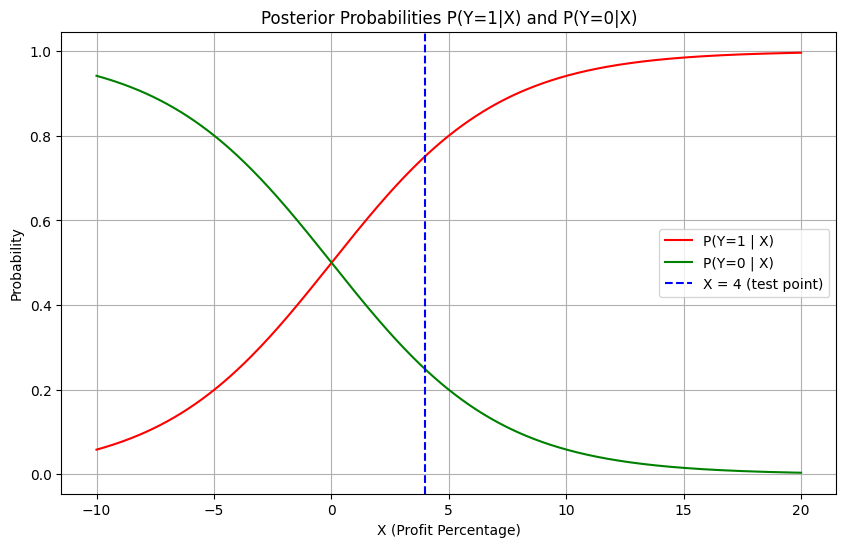

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_vals, posterior_y1_given_x, label='P(Y=1 | X)', color='red')
plt.plot(x_vals, posterior_y0_given_x, label='P(Y=0 | X)', color='green')
plt.axvline(x=4, color='blue', linestyle='--', label='X = 4 (test point)')
plt.title('Posterior Probabilities P(Y=1|X) and P(Y=0|X)')
plt.xlabel('X (Profit Percentage)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

**Take Away:**


*   At X = 4, the red curve is higher than the green curve, meaning: → The model predicts Y = 1 → the company is likely to issue a dividend.

* The red curve increases with X (more profit = higher chance of issuing dividends).

* The green curve decreases with X (less profit = less chance of issuing dividends).

* The intersection point of red and green is the decision boundary (around X ≈ 0.6), where the model is equally likely to predict either class.

### LDA Discriminant Function

In [ ]:
# Discriminant functions
def delta1(x):
    return (x * mu1 / sigma2) - (mu1**2 / (2 * sigma2)) + np.log(pi1)

def delta0(x):
    return (x * mu0 / sigma2) - (mu0**2 / (2 * sigma2)) + np.log(pi0)

In [ ]:
# Compute discriminants
d1_vals = delta1(x_vals)
d0_vals = delta0(x_vals)

In [ ]:

# Find decision boundary (where d1 = d0)
decision_boundary = x_vals[np.argmin(np.abs(d1_vals - d0_vals))]


In [ ]:
decision_boundary

np.float64(-0.020040080160320883)

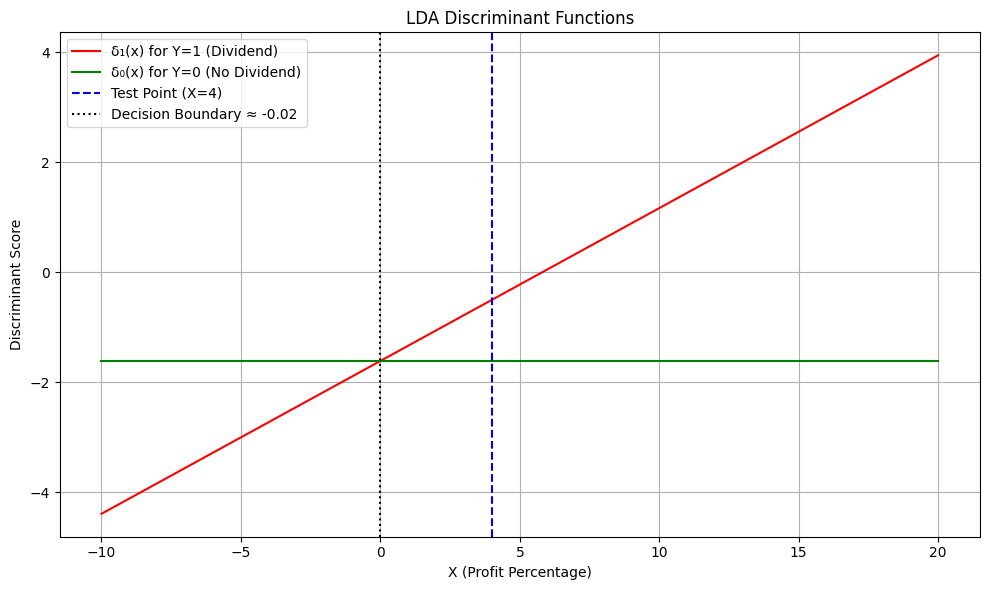

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, d1_vals, label='δ₁(x) for Y=1 (Dividend)', color='red')
plt.plot(x_vals, d0_vals, label='δ₀(x) for Y=0 (No Dividend)', color='green')
plt.axvline(x=4, color='blue', linestyle='--', label='Test Point (X=4)')
plt.axvline(x=decision_boundary, color='black', linestyle=':', label=f'Decision Boundary ≈ {decision_boundary:.2f}')
plt.title('LDA Discriminant Functions')
plt.xlabel('X (Profit Percentage)')
plt.ylabel('Discriminant Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Final Summary**
* They all create a decision boundary, but:

* KNN learns a flexible boundary from the data

* Naive Bayes computes probabilities to define the boundary

* LDA derives a mathematical boundary based on distributions and priors